In [1]:
import cv2
import matplotlib.pyplot as plt
import os

os.chdir("..")
from utils.yolo_to_haar import get_haar_annotations

In [2]:
dataset_path = os.path.join('dataset', 'sampleplates')
image_files = [os.path.join(dataset_path, p) for p in os.listdir(dataset_path) if p.lower().endswith('.png')]

print(f"Found {len(image_files)} images in '{dataset_path}'")
if not image_files:
    print("No images to evaluate. Please verify dataset path.")

Found 10 images in 'dataset\sampleplates'


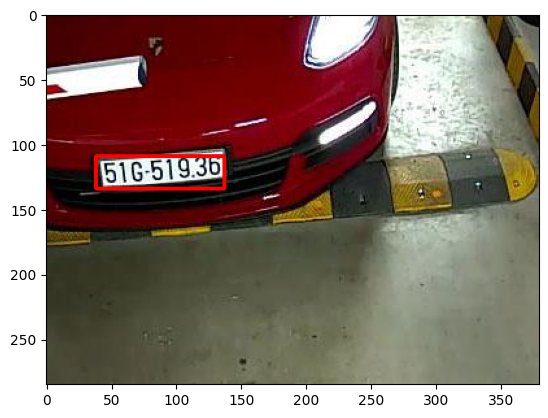

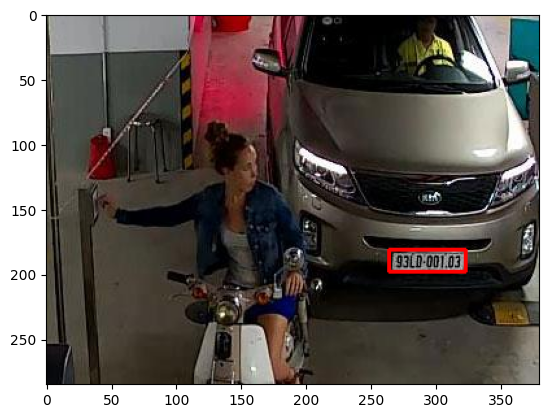

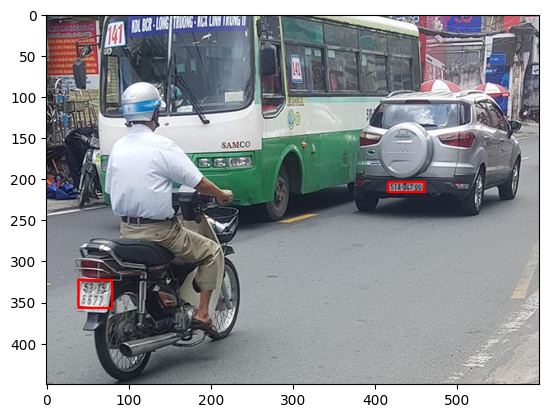

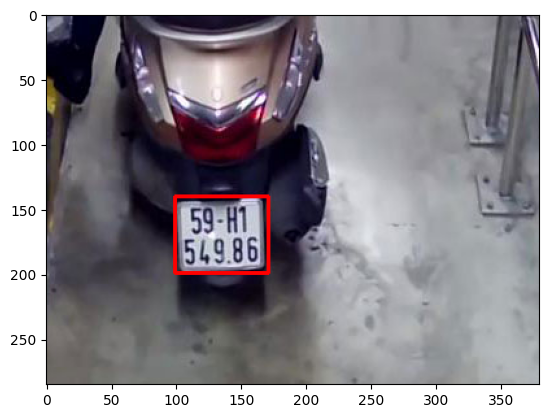

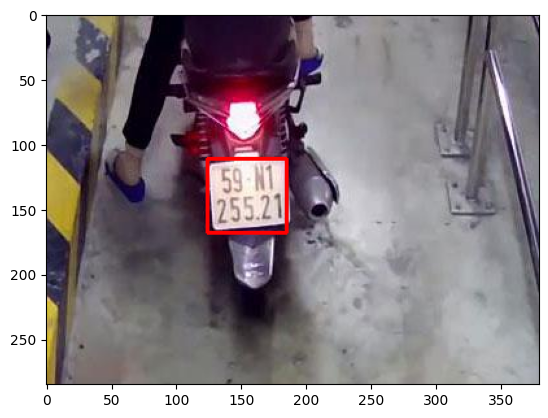

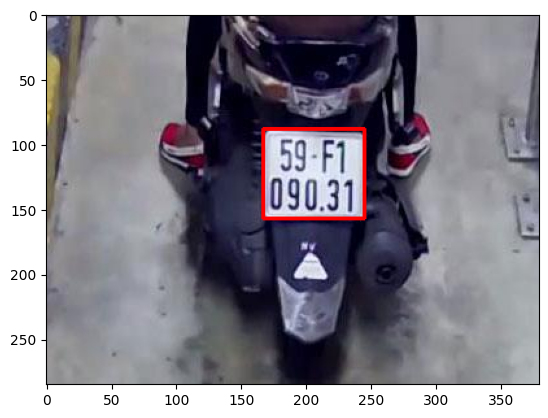

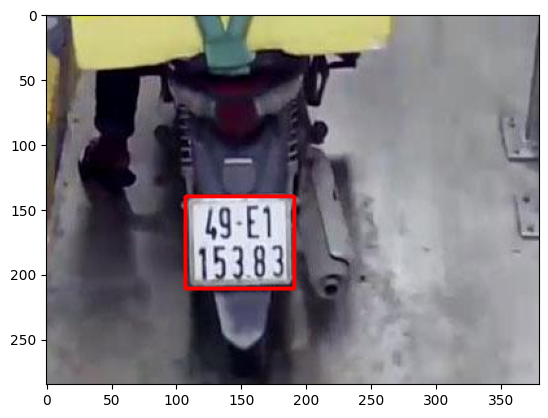

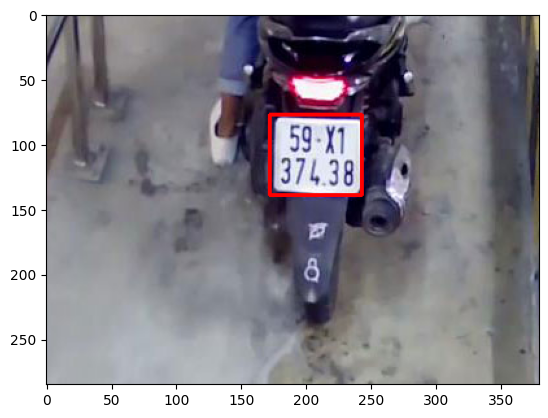

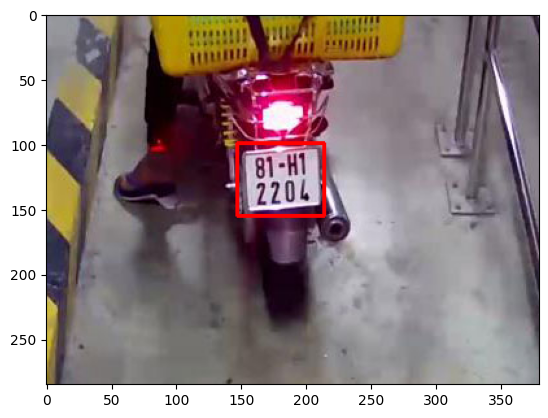

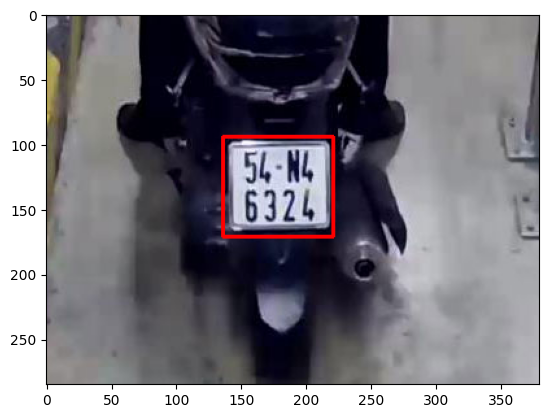

In [3]:
for image_path in image_files:
    image = cv2.imread(image_path)

    label_path = os.path.join("dataset", "licenseplates", "labels", "train", os.path.basename(image_path).replace(".png", ".txt"))

    haar_data = get_haar_annotations(image_path, label_path)

    for class_id, bboxes in haar_data.items():
        for bbox in bboxes:
            x, y, w, h = map(int, bbox.split())
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()